In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

### CIFAR10 Dataset 생성 
* tf.keras.datasets의 cifar10.load_data()는 웹에서 Local computer로 Download후 train과 test용 image와 label array로 로딩. 

In [13]:
from tensorflow.keras.datasets import cifar10 # CIFAR 10은 데이터양이 적어서 모델의 성능 평가를 위해서 많이 쓰인다.

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [14]:
train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [15]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


### CIFAR10 데이터 시각화
* 이미지 크기는 32x32이며 RGB채널. 
* 전반적으로 Label에 해당하는 대상이 이미지의 중앙에 있고, Label 대상 오브젝트 위주로 이미지가 구성. 

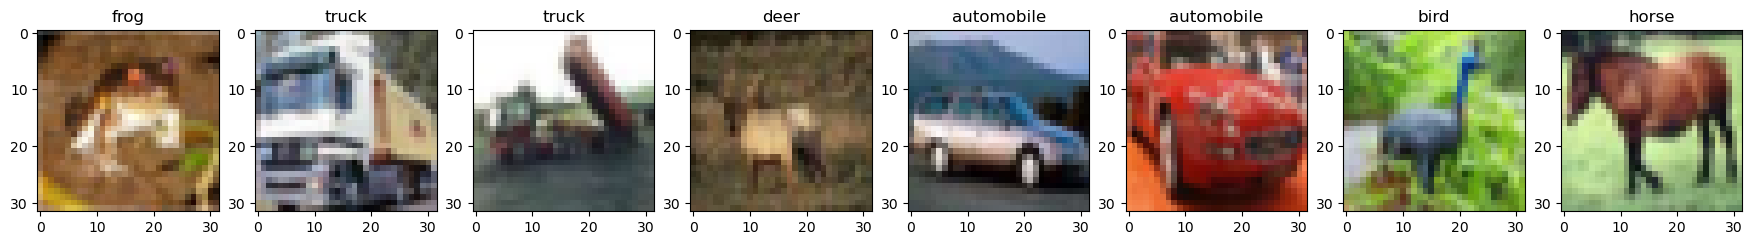

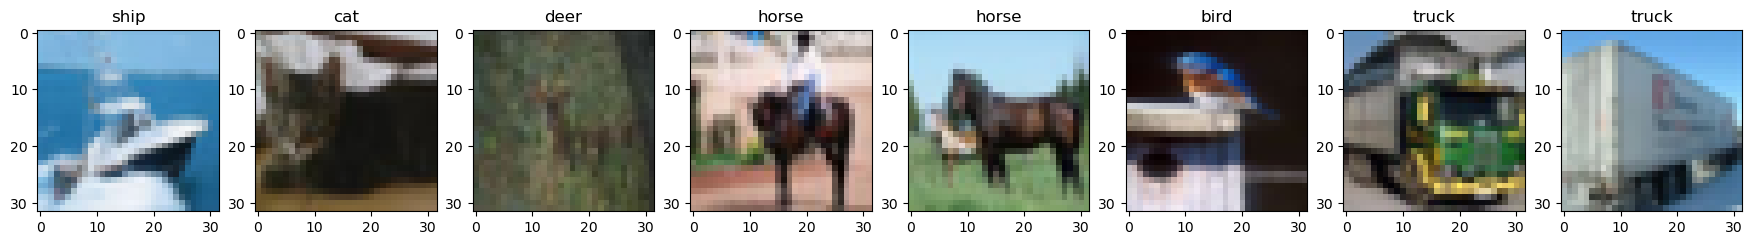

In [16]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze() # train_labels의 shape가 (50000, 1)으로 2차원인데 squeeze를 통해 1차원으로 변경함
        axs[i].set_title(NAMES[int(label)])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### Data preprocessing
* image array의 0 ~ 255 사이의 값으로 되어 있는 pixel intensity 값을 0 ~ 1 사이 값으로 변환. 정수값 pixel 값을 255.0 으로 나눔. 
* label array는 숫자형 값으로 바꾸되, 원-핫 인코딩을 적용할지 선택. 일반적으로 원-핫 인코딩을 적용하는게 Keras Framework활용이 용이
* image array, label array 모두 float32 형으로 변환. numpy 의 float32는 tensor 변환시 tf.float32 로 변환되며 기본적으로 Tensorflow backend Keras는 tf.float32를 기반으로 함. 


In [17]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Sparse Categorical Crossentropy를 Loss function으로 쓰면 labels에 One Hot Encoding을 적용할 필요 없음
# label은 원-핫 인코딩이 Keras에서는 활용이 용이하나, 여기서는 sparse categorical crossentropy 테스트를 위해 적용하지 않음. 
def get_preprocessed_data(images, labels):
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [18]:
train_images[0, :, :, :]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [19]:
# Keras는 CNN(정확히는 CNN 2D) 모델에 학습 데이터를 입력할 시 반드시 Image array는 4차원 배열이 되어야 함. 
# RGB 채널 이미지 array는 기본적으로 3차원임. 여기에 이미지의 갯수를 포함하므로 4차원이 됨.  
# 만일 Grayscale인 2차원 이미지 array라도 의도적으로 채널을 명시해서 3차원으로 만들어 주고, 여기에 이미지 개수를 포함해서 4차원이 됨. 

print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [20]:
# label 데이터가 2차원임. 이를 Keras 모델에 입력해도 별 문제없이 동작하지만, label의 경우는 OHE적용이 안되었는지를 알 수 있게 명확하게 1차원으로 표현해 주는것이 좋음. 
# 2차원인 labels 데이터를 1차원으로 변경. 
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

### Custom Model 생성
* CNN Model의 맨처음 Layer는 Input layer. Input layer의 shape를 이미지 사이즈와 RGB 3채널에 맞게 (32, 32, 3) 으로 설정.
* Conv 연산을 연달아 적용하고 MaxPooling을 적용하는 루틴으로 모델 생성. MaxPooling을 적용 후에는 필터 갯수를 더욱 증가 시킴. 
* MaxPooling 적용 후에 출력 피처맵의 사이즈는 작아지되, 채널(깊이)는 늘어나는 형태로 모델 생성. 
* CIFAR10의 Label수가 10개이므로 Classification을 위한 맨 마지막 Dense layer의 units 갯수는 10개임
* label값이 원-핫 인코딩 되지 않았기 때문에 model.compile()에서 loss는 반드시 sparse_categorical_crossentropy여야함. 
* 만일 label값이 원-핫 인코딩 되었다면 loss는 categorical_crossentropy 임. 

In [21]:
IMAGE_SIZE = 32

In [22]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                           

In [23]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이 아니므로 loss는 sparse_categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model 학습 수행 및 테스트 데이터로 평가 
* Model의 fit() 메소드를 호출하여 학습
* fit()은 학습 데이터가 Numpy array 자체로 들어올때, Generator 형태로 들어올때 약간의 수행로직 차이가 있음. 
* 인자로 x에는 학습 image data, y는 학습 label 데이터. 
* batch_size는 한번에 가져올 image/label array 갯수. 1개씩 가져오면 수행속도가 너무 느리고, 전체를 가져오면 GPU Memory 부족이 발생할 수 있으므로 적절한 batch_size 설정이 필요. 만약 학습 데이터가 generator일 경우, fit()에서 batch_size를 설정하지 않음. 
* epochs 는 전체 학습 데이터 학습을 반복 수행할 횟수
* steps_per_epoch는 전체 학습 데이터를 몇번 배치 작업으로 수행하는가를 의미. 보통 입력데이터가 generator일 경우 설정. 
* validation_data는 검증용 데이터 세트
* validation_steps는 검증용 데이터의 steps_per_epoch임. 
* validation_split는 validation_data로 별도의 검증용 데이터 세트를 설정하지 않고 자동으로 학습용 데이터에서 검증용 데이터 세트 분할. 


In [24]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 18s 9ms/step - loss: 1.6447 - accuracy: 0.3935 - val_loss: 2.0850 - val_accuracy: 0.5103
Epoch 2/30
665/665 [==============================] - 5s 8ms/step - loss: 1.2169 - accuracy: 0.5667 - val_loss: 2.8424 - val_accuracy: 0.6057
Epoch 3/30
665/665 [==============================] - 5s 8ms/step - loss: 1.0509 - accuracy: 0.6320 - val_loss: 7.6915 - val_accuracy: 0.6647
Epoch 4/30
665/665 [==============================] - 5s 8ms/step - loss: 0.9613 - accuracy: 0.6599 - val_loss: 15.6584 - val_accuracy: 0.6656
Epoch 5/30
665/665 [==============================] - 6s 8ms/step - loss: 0.9058 - accuracy: 0.6796 - val_loss: 26.7442 - val_accuracy: 0.6777
Epoch 6/30
665/665 [==============================] - 6s 9ms/step - loss: 1.0868 - accuracy: 0.6207 - val_loss: 105.1751 - val_accuracy: 0.6744
Epoch 7/30
665/665 [==============================] - 5s 8ms/step - loss: 0.8731 - accuracy: 0.6922 - val_loss: 99.5223 - val_accuracy: 0.7035


313/313 [==============================] - 1s 4ms/step - loss: 48.5765 - accuracy: 0.1013


[48.5765380859375, 0.10130000114440918]

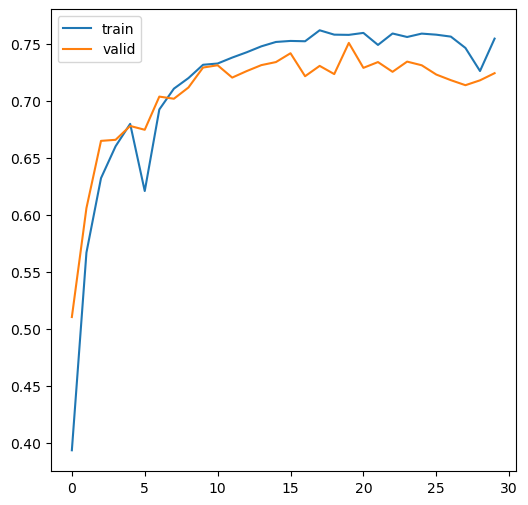

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05)) # np.arange()는 numpy array를 반환
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_labels)

### model.predict()를 통해 이미지 분류 예측
* 4차원 이미지 배열을 입력해서 모델학습함. predict()시에도 4차원 이미지 배열을 입력해야함. 
* 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의  

In [26]:
# 아래 코드는 오류 발생. Conv2D를 사용한 모델에 4차원 이미지 배열을 입력해서 모델을 학습했으므로 predict()시에도 테스트용 4차원 이미지 배열을 입력해야 함.  
preds = model.predict(test_images[0])

ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 32, 3)


In [27]:
# 테스트용 4차원 이미지 배열을 입력해서 predict()수행. 
# predict()의 결과는 softmax 적용 결과임. 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의 
preds = model.predict(np.expand_dims(test_images[0], axis=0))
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

1/1 [==============================] - 0s 195ms/step
예측 결과 shape: (1, 10)
예측 결과: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [28]:
preds = model.predict(test_images[:32], batch_size=32)
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

1/1 [==============================] - 0s 25ms/step
예측 결과 shape: (32, 10)
예측 결과: [[3.65277323e-37 0.00000000e+00 1.00000000e+00 7.30349059e-10
  3.96933506e-20 4.45886216e-27 0.00000000e+00 4.21811144e-24
  0.00000000e+00 0.00000000e+00]
 [8.55394453e-02 3.42880301e-02 1.17678866e-01 1.60898566e-01
  1.74707413e-01 9.57420021e-02 1.31329224e-01 6.02727495e-02
  8.24099332e-02 5.71336746e-02]
 [1.15666103e-13 1.63247010e-28 1.00000000e+00 3.07713321e-08
  1.74053119e-10 8.27777718e-16 8.93399212e-26 5.64722661e-12
  3.09569780e-21 1.45485856e-37]
 [1.36177858e-16 0.00000000e+00 1.00000000e+00 3.80864047e-12
  1.48493210e-14 1.18347372e-21 3.84083251e-35 1.26480270e-16
  2.58468022e-27 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.03561342e-01 3.96438718e-01
  1.02774438e-19 1.09322258e-20 0.00000000e+00 1.01539911e-26
  0.00000000e+00 0.00000000e+00]
 [2.59531819e-29 0.00000000e+00 1.00000000e+00 2.27370549e-08
  1.24183109e-15 1.00946377e-21 2.32982932e-37 7.48778172e-20
  7.101892

In [29]:
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [2 4 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 3 2]


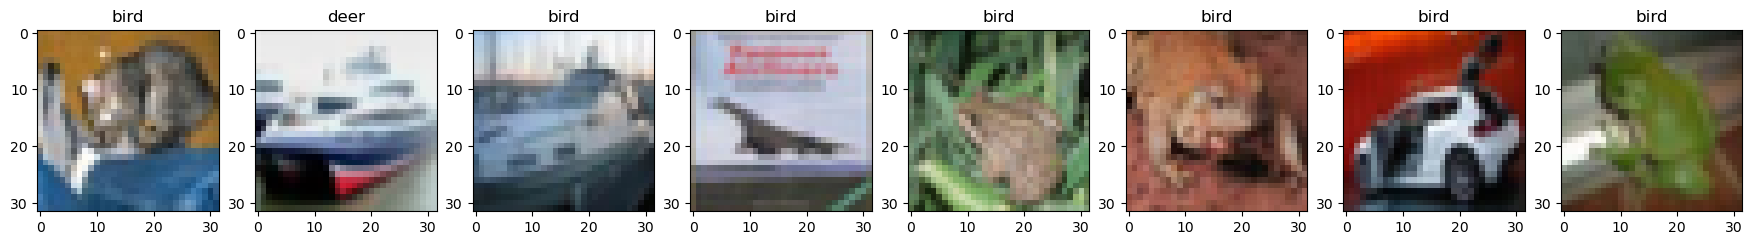

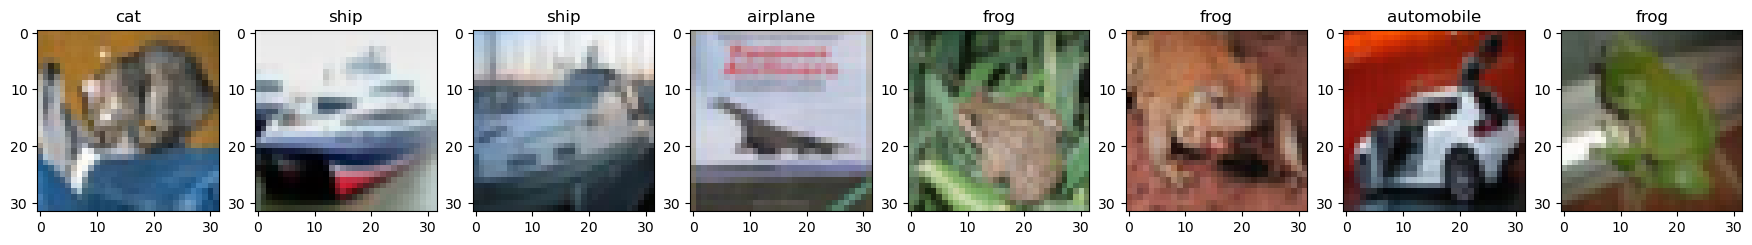

In [36]:
show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)

### 평균이 0 이고 표준편차가 1인 표준 정규분포에서 난수 추출
* 표준 편차가 클 수록 개별 값의 크기가 일반적으로 커짐.

In [31]:
numbers = np.random.normal(loc=0.0,  scale=1, size=[100, 100]) # loc는 평균, scale은 표준편차, size는 2차원 행렬의 크기
print(numbers)
print(numbers.mean())
print(numbers.std())
print(numbers.sum())

[[ 1.48860905  0.67601087 -0.41845137 ...  0.4259372   0.75663603
  -0.99485406]
 [-0.74057432  0.45823318  1.2572469  ... -0.62422805 -0.64376242
  -0.68625396]
 [ 0.44122202  0.8558804   0.14771668 ... -1.22651695 -0.72269499
  -0.61902635]
 ...
 [-0.71978504  1.09716258  1.03378686 ... -0.11506223  0.47291885
  -0.24979513]
 [ 1.7370662   1.61550416 -0.70881919 ...  1.1716381   0.07612806
  -0.01698762]
 [-0.07120966 -0.32620432 -0.4170676  ...  1.32395352 -0.10867265
  -1.68832859]]
-0.00015265164985581877
1.0043607357382498
-1.5265164985581876


### Xavier initialization - 정규분포(glorot_normal), 균일분포(glorot_uniform) 

In [32]:
# glorot_normal
fan_in = 20
fan_out = 15
scale_value = np.sqrt(2/(fan_in + fan_out))
print('scale:', scale_value)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

scale: 0.23904572186687872
[[ 0.3040054  -0.04589377 -0.08014084 ...  0.0173069  -0.22293148
   0.04280563]
 [ 0.0406822  -0.07614755  0.31573997 ...  0.24829319  0.23023012
  -0.34679948]
 [ 0.27264221  0.21954968 -0.22508752 ...  0.18202375 -0.30206829
  -0.07651701]
 ...
 [ 0.17339597 -0.06430417 -0.09435792 ...  0.31364923  0.06389898
   0.57051445]
 [-0.08156649 -0.04331485 -0.00686039 ... -0.08650334 -0.2277199
  -0.4955416 ]
 [ 0.04936943 -0.1281917  -0.20190832 ... -0.23615253  0.10504617
  -0.09294331]]
weights mean: -1.9911723412195225e-05 std: 0.23803994727151107 sum: -0.19911723412195226


In [33]:
# glorot_uniform
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in + fan_out))
print('limit:', limit)
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

limit: 0.5773502691896257
[[ 0.22466372 -0.31187709 -0.03421312 ...  0.38358751  0.0794568
   0.03269757]
 [ 0.45558392  0.39737045  0.1983645  ...  0.29129939  0.33830569
   0.36994373]
 [ 0.29888249  0.09045955 -0.46006051 ... -0.29693701  0.46859697
   0.30691551]
 ...
 [-0.05620084 -0.16305886  0.57238367 ... -0.08327987 -0.10178937
   0.27565955]
 [-0.18557585  0.57666081 -0.04056186 ... -0.14049033 -0.16847339
  -0.52367086]
 [-0.13000605 -0.18875035  0.53368781 ... -0.2741631  -0.37902083
  -0.36079616]]
weights mean: -0.0015909079631894886 std: 0.3339571153436509 sum: -15.909079631894887


### He initialization - 정규분포(he_normal), 균일분포(he_uniform) 

In [37]:
fan_in = 10
fan_out = 8
scale_value = np.sqrt(2/(fan_in))
print('scale:', scale_value)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

scale: 0.4472135954999579
[[-0.26735001 -0.48584439 -0.38059608 ...  0.7405136  -0.12232687
   0.40447773]
 [-0.2488976   0.43902613 -0.01200605 ... -0.3601628  -0.58711989
   0.59599636]
 [-0.19210154 -0.45651448  0.06183603 ... -0.19750047  0.16921414
  -0.05042235]
 ...
 [ 0.97063953  0.49070416  0.29897762 ...  0.08482535  0.54540102
   0.53895635]
 [ 0.08983043 -0.06892724  0.37833452 ... -0.29116149  0.1643902
   0.59361692]
 [-0.05842287 -0.63396021 -0.93079466 ...  0.2028016   0.11800358
  -0.12795539]]
weights mean: 0.001979040414579067 std: 0.44488144331652135 sum: 19.790404145790667


In [38]:
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in))
print('limit:', limit)
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

limit: 0.7745966692414834
[[-0.21818972 -0.11881855 -0.16003913 ... -0.15401862  0.20987643
   0.6098274 ]
 [ 0.48487072  0.12669446 -0.03932405 ... -0.63068903 -0.27993711
   0.08775645]
 [-0.5997816   0.03125243  0.6734184  ... -0.65111437 -0.66754625
  -0.08932085]
 ...
 [ 0.24667253  0.73753955 -0.28446269 ...  0.75878609 -0.12563921
   0.15878044]
 [ 0.50610802 -0.56767909 -0.20387456 ... -0.29101973  0.21679123
   0.46704138]
 [-0.20725769  0.41389088  0.43313816 ... -0.58097034 -0.44818774
  -0.05207805]]
weights mean: -0.009341600338951815 std: 0.445146162687945 sum: -93.41600338951815


### weight 초기화를 He Normal로 변경 후 성능 검증
* Keras Conv2D의 기본 weight 초기화는 glorot_uniform임. 이를 he_normal로 변경 후 동일 모델로 성능 테스트 
* label은 원-핫 인코딩을 적용 

In [39]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


def get_preprocessed_data(images, labels):
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    labels = labels.squeeze()
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
print(train_images.shape, train_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [40]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                           

In [41]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이므로 loss는 categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 10s 9ms/step - loss: 1.5937 - accuracy: 0.4178 - val_loss: 2.3490 - val_accuracy: 0.5031
Epoch 2/30
665/665 [==============================] - 6s 9ms/step - loss: 1.1964 - accuracy: 0.5753 - val_loss: 3.8578 - val_accuracy: 0.6108
Epoch 3/30
665/665 [==============================] - 5s 8ms/step - loss: 1.0357 - accuracy: 0.6362 - val_loss: 6.6227 - val_accuracy: 0.6796
Epoch 4/30
665/665 [==============================] - 6s 8ms/step - loss: 0.9359 - accuracy: 0.6749 - val_loss: 10.1411 - val_accuracy: 0.6912
Epoch 5/30
665/665 [==============================] - 6s 9ms/step - loss: 0.8937 - accuracy: 0.6909 - val_loss: 17.7471 - val_accuracy: 0.7283
Epoch 6/30
665/665 [==============================] - 6s 9ms/step - loss: 0.8290 - accuracy: 0.7115 - val_loss: 29.7386 - val_accuracy: 0.6911
Epoch 7/30
665/665 [==============================] - 6s 9ms/step - loss: 0.9145 - accuracy: 0.6848 - val_loss: 39.9603 - val_accuracy: 0.7044
E

313/313 [==============================] - 1s 4ms/step - loss: 2.3929 - accuracy: 0.1000


[2.392857551574707, 0.10000000149011612]

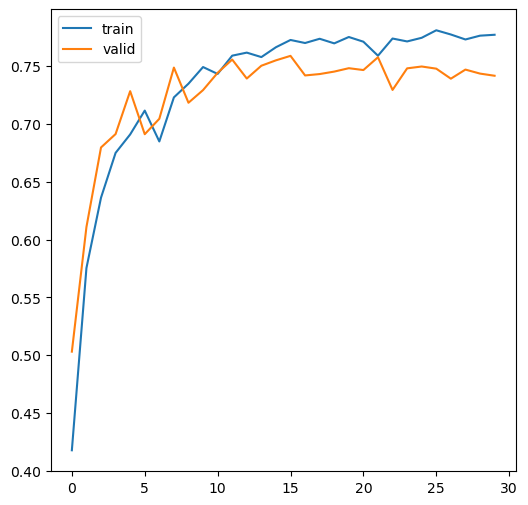

In [44]:
show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_oh_labels)

### Batch Normalization을 모델에 적용 후 성능 검증

In [45]:
import tensorflow as tf
import numpy as np
import random as python_random

np.random.seed(2021)
python_random.seed(2021)
tf.random.set_seed(2021)

In [46]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                           

In [47]:
# label값이 원-핫 인코딩이 아니므로 loss는 categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 13s 11ms/step - loss: 1.6060 - accuracy: 0.4242 - val_loss: 1.4157 - val_accuracy: 0.4825
Epoch 2/30
665/665 [==============================] - 7s 10ms/step - loss: 1.1513 - accuracy: 0.5882 - val_loss: 1.0563 - val_accuracy: 0.6137
Epoch 3/30
665/665 [==============================] - 7s 11ms/step - loss: 0.9627 - accuracy: 0.6602 - val_loss: 1.3006 - val_accuracy: 0.5571
Epoch 4/30
665/665 [==============================] - 7s 11ms/step - loss: 0.8246 - accuracy: 0.7130 - val_loss: 0.9839 - val_accuracy: 0.6440
Epoch 5/30
665/665 [==============================] - 7s 10ms/step - loss: 0.7329 - accuracy: 0.7467 - val_loss: 0.8155 - val_accuracy: 0.7256
Epoch 6/30
665/665 [==============================] - 7s 10ms/step - loss: 0.6626 - accuracy: 0.7732 - val_loss: 0.7192 - val_accuracy: 0.7592
Epoch 7/30
665/665 [==============================] - 7s 10ms/step - loss: 0.6039 - accuracy: 0.7914 - val_loss: 0.7398 - val_accuracy: 0.740

In [48]:
model.evaluate(test_images, test_oh_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.7236 - accuracy: 0.8264


[0.7236219048500061, 0.8263999819755554]

### He Normal 적용 후 Batch Normalization

In [49]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                          

In [50]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 12s 11ms/step - loss: 1.5973 - accuracy: 0.4233 - val_loss: 1.3409 - val_accuracy: 0.5068
Epoch 2/30
665/665 [==============================] - 7s 10ms/step - loss: 1.1390 - accuracy: 0.5927 - val_loss: 1.0009 - val_accuracy: 0.6440
Epoch 3/30
665/665 [==============================] - 7s 11ms/step - loss: 0.9335 - accuracy: 0.6687 - val_loss: 0.8455 - val_accuracy: 0.7065
Epoch 4/30
665/665 [==============================] - 7s 10ms/step - loss: 0.8158 - accuracy: 0.7148 - val_loss: 0.7570 - val_accuracy: 0.7395
Epoch 5/30
665/665 [==============================] - 7s 10ms/step - loss: 0.7277 - accuracy: 0.7463 - val_loss: 0.7507 - val_accuracy: 0.7468
Epoch 6/30
665/665 [==============================] - 7s 10ms/step - loss: 0.6572 - accuracy: 0.7736 - val_loss: 0.8360 - val_accuracy: 0.7135
Epoch 7/30
665/665 [==============================] - 7s 11ms/step - loss: 0.5977 - accuracy: 0.7913 - val_loss: 0.7026 - val_accuracy: 0.758

In [52]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 1s 5ms/step - loss: 0.7680 - accuracy: 0.8113


[0.7679948210716248, 0.8112999796867371]

In [53]:
preds = model.predict(np.expand_dims(test_images[0], axis=0))
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

1/1 [==============================] - 0s 233ms/step
예측 클래스 값: [5]


### 학습 시 데이터를 섞는 shuffle 적용 유무에 따른  성능 테스트

In [55]:
import tensorflow as tf
import numpy as np
import random as python_random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# seed 를 설정해서 학습시마다 동일한 결과 유도. 불행히도 의도한 대로 동작하지 않음. 
def set_random_seed(seed_value):
    np.random.seed(seed_value)
    python_random.seed(seed_value)
    tf.random.set_seed(seed_value)

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 

In [56]:
from tensorflow.keras.datasets import cifar10

# random seed는 2021로 고정.
set_random_seed(2021)
# CIFAR10 데이터 재 로딩 및 Scaling/OHE 전처리 적용하여 학습/검증/데이터 세트 생성. 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(42500, 32, 32, 3) (42500, 10) (7500, 32, 32, 3) (7500, 10) (10000, 32, 32, 3) (10000, 10)


### model 생성을 위한 별도 함수 생성

In [58]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

def create_model():
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    #x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = Activation('relu')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    # cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
    x = Flatten(name='flatten')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(300, activation='relu', name='fc1')(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(10, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    #model.summary()
    
    return model


### shuffle을 False/True 변경하면서 테스트 

In [59]:
model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# 먼저 shuffle을 false로 테스트 
noshuffle_history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=64, epochs=30, shuffle=False, # shuffle은 디폴트가 True (셔플 적용해야 성능이 약간 상승한다.)
                    validation_data=(val_images, val_oh_labels))
evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=64)
print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)

# model이 반복적으로 메모리 차지하는것을 없애기 위해서 수행. 
tftf.keras.backend.clear_session()

Epoch 1/30
665/665 [==============================] - 13s 12ms/step - loss: 1.5923 - accuracy: 0.4268 - val_loss: 1.3634 - val_accuracy: 0.5148
Epoch 2/30
665/665 [==============================] - 7s 10ms/step - loss: 1.1226 - accuracy: 0.6002 - val_loss: 1.4980 - val_accuracy: 0.5128
Epoch 3/30
665/665 [==============================] - 7s 11ms/step - loss: 0.9299 - accuracy: 0.6718 - val_loss: 0.8660 - val_accuracy: 0.6943
Epoch 4/30
665/665 [==============================] - 7s 11ms/step - loss: 0.8097 - accuracy: 0.7177 - val_loss: 0.7932 - val_accuracy: 0.7180
Epoch 5/30
665/665 [==============================] - 7s 10ms/step - loss: 0.7224 - accuracy: 0.7485 - val_loss: 0.7357 - val_accuracy: 0.7480
Epoch 6/30
665/665 [==============================] - 7s 11ms/step - loss: 0.6474 - accuracy: 0.7752 - val_loss: 0.7342 - val_accuracy: 0.7473
Epoch 7/30
665/665 [==============================] - 7s 10ms/step - loss: 0.5912 - accuracy: 0.7960 - val_loss: 0.9422 - val_accuracy: 0.711

### shuffle을 True로 변경하고 학습 및 테스트

In [60]:
model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# shuffle을 True로 변경하여 학습 및 테스트
shuffle_history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=64, epochs=30, shuffle=True, 
                    validation_data=(val_images, val_oh_labels))
evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=64)
print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)

tf.keras.backend.clear_session()

Epoch 1/30
665/665 [==============================] - 14s 11ms/step - loss: 1.5918 - accuracy: 0.4261 - val_loss: 1.2123 - val_accuracy: 0.5735
Epoch 2/30
665/665 [==============================] - 7s 10ms/step - loss: 1.1108 - accuracy: 0.6004 - val_loss: 0.9521 - val_accuracy: 0.6639
Epoch 3/30
665/665 [==============================] - 7s 11ms/step - loss: 0.9277 - accuracy: 0.6723 - val_loss: 0.8758 - val_accuracy: 0.6988
Epoch 4/30
665/665 [==============================] - 7s 10ms/step - loss: 0.8130 - accuracy: 0.7158 - val_loss: 1.0529 - val_accuracy: 0.6332
Epoch 5/30
665/665 [==============================] - 7s 10ms/step - loss: 0.7404 - accuracy: 0.7413 - val_loss: 0.9628 - val_accuracy: 0.6481
Epoch 6/30
665/665 [==============================] - 7s 10ms/step - loss: 0.6681 - accuracy: 0.7681 - val_loss: 0.8388 - val_accuracy: 0.7181
Epoch 7/30
665/665 [==============================] - 7s 10ms/step - loss: 0.6107 - accuracy: 0.7865 - val_loss: 0.7355 - val_accuracy: 0.754

### 위에서 수행한 Shuffle테스트 시 validation 데이터 기반 성능 검증 시각화 

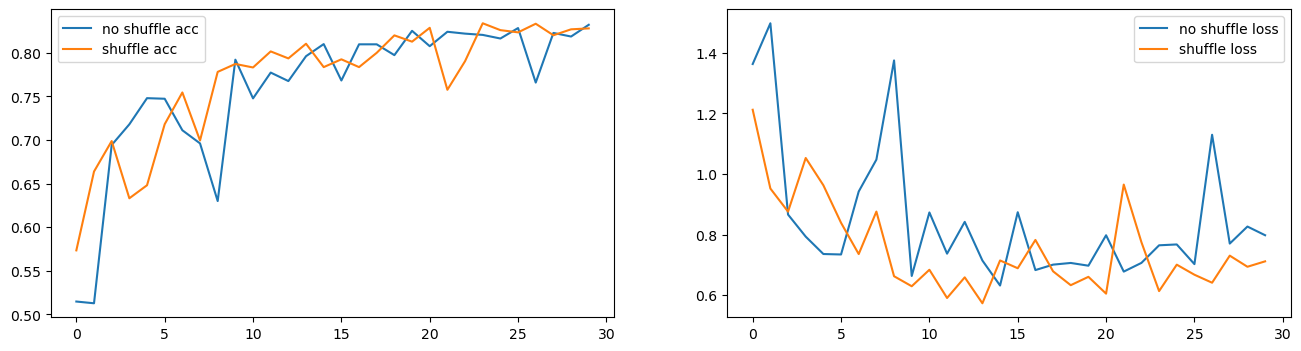

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history_shuffle(noshuffle_history, shuffle_history):
    figure, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
    # shuffle과 no shuffle의 validation accuracy 비교 
    axs[0].plot(noshuffle_history.history['val_accuracy'], label='no shuffle acc')
    axs[0].plot(shuffle_history.history['val_accuracy'], label='shuffle acc')
    # shuffle과 no shuffle의 validation loss 비교 
    axs[1].plot(noshuffle_history.history['val_loss'], label='no shuffle loss')
    axs[1].plot(shuffle_history.history['val_loss'], label='shuffle loss')
    axs[0].legend()
    axs[1].legend()

show_history_shuffle(noshuffle_history, shuffle_history)


### batch 크기를 32, 64, 256, 512로 변경하면서 테스트

In [62]:
b_sizes = [32, 64, 256, 512]
histories = []
evaluations = []
for b_size in b_sizes:
    model = create_model()
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    # batch_size를 순차적으로 32, 64, 256, 512로 변경하여 학습 및 evaluation 수행. 
    print('##### batch size :', b_size, '학습 #####')
    history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=b_size, epochs=30, 
                        shuffle=True, validation_data=(val_images, val_oh_labels))
    # batch size별 학습 history 결과 저장. 
    histories.append(history)
    # 테스트 세트로 evaluation 수행하고 batch size별 결과 저장. 
    evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=b_size)
    print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)
    evaluations.append(evaluation_result)
    
    tf.keras.backend.clear_session()

##### batch size : 32 학습 #####
Epoch 1/30
1329/1329 [==============================] - 21s 11ms/step - loss: 1.5488 - accuracy: 0.4364 - val_loss: 1.3393 - val_accuracy: 0.5508
Epoch 2/30
1329/1329 [==============================] - 14s 10ms/step - loss: 1.1032 - accuracy: 0.6061 - val_loss: 1.0009 - val_accuracy: 0.6360
Epoch 3/30
1329/1329 [==============================] - 14s 10ms/step - loss: 0.9121 - accuracy: 0.6791 - val_loss: 0.9212 - val_accuracy: 0.6831
Epoch 4/30
1329/1329 [==============================] - 13s 9ms/step - loss: 0.7980 - accuracy: 0.7225 - val_loss: 0.8065 - val_accuracy: 0.7141
Epoch 5/30
1329/1329 [==============================] - 13s 10ms/step - loss: 0.7192 - accuracy: 0.7527 - val_loss: 0.6860 - val_accuracy: 0.7659
Epoch 6/30
1329/1329 [==============================] - 13s 10ms/step - loss: 0.6433 - accuracy: 0.7795 - val_loss: 0.9559 - val_accuracy: 0.7020
Epoch 7/30
1329/1329 [==============================] - 13s 10ms/step - loss: 0.5878 - accurac

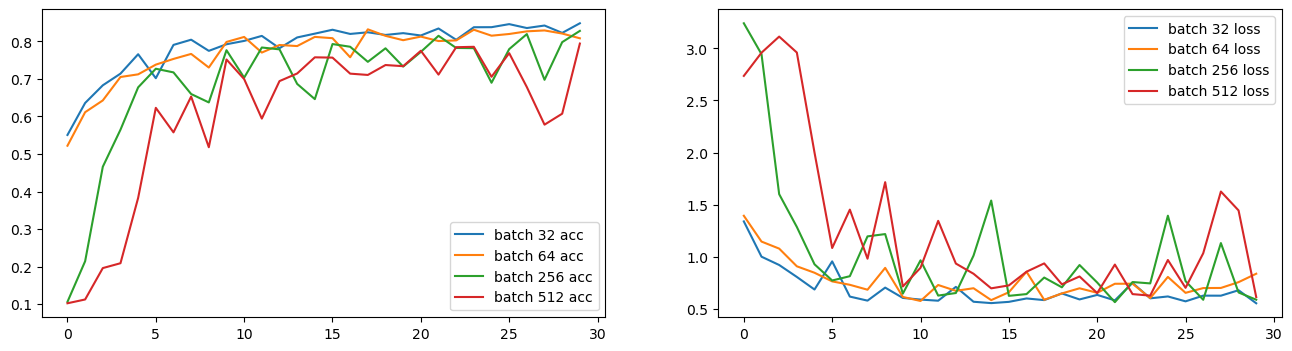

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history_batch(histories):
    figure, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))  
    # batch 크기별 validation accuracy 비교 
    axs[0].plot(histories[0].history['val_accuracy'], label='batch 32 acc')
    axs[0].plot(histories[1].history['val_accuracy'], label='batch 64 acc')
    axs[0].plot(histories[2].history['val_accuracy'], label='batch 256 acc')
    axs[0].plot(histories[3].history['val_accuracy'], label='batch 512 acc')
    
    # batch 크기별 validation loss 비교
    axs[1].plot(histories[0].history['val_loss'], label='batch 32 loss')
    axs[1].plot(histories[1].history['val_loss'], label='batch 64 loss')
    axs[1].plot(histories[2].history['val_loss'], label='batch 256 loss')
    axs[1].plot(histories[3].history['val_loss'], label='batch 512 loss')
    
    axs[0].legend()
    axs[1].legend()

show_history_batch(histories)